# 6. Обучение с учителем

# Отток клиентов

На основании исторических данных о поведении клиентов и расторжении договоров с банком необходимо спрогнозировать уход клиента из банка. Качество построенной модели классификации необходимо оценить на основании F1-меры (ее значение должно составлять не менее 0.5).

### План проекта
1. [Изучение данных](#introduction) <br>
2. [Обработка дубликатов и пропусков](#paragraph1) <br>
3. [Исследование моделей](#paragraph3) <br>
 3.1 [Выделение характеристик и целевого признака](#subparagraph1) <br>
 3.2 [Исследование моделей без учета дисбаланса классов](#subparagraph2) <br>
 3.3 [Борьба с дисбалансом классов](#subparagraph3) <br>
 3.4 [Обучение логистической регрессии](#subparagraph4) <br>
     3.4.1 [Обучение на сырых данных](#subparagraph5) <br>
   3.4.2 [Обучение на данных с параметром class_weight = 'balanced'](#subparagraph6) <br>
   3.4.3 [Обучение на данных с применением процедуры upsample](#subparagraph7) <br>
   3.4.4 [Обучение на данных с применением процедуры downsample](#subparagraph8) <br>
 3.5 [Обучение модели решающего дерева](#subparagraph9) <br>
   3.5.1 [Обучение на сырых данных](#subparagraph10) <br>
   3.5.2 [Обучение на данных с параметром class_weight = 'balanced'](#subparagraph11) <br>
   3.5.3 [Обучение на данных с применением процедуры upsample](#subparagraph12) <br>
   3.5.4 [Обучение на данных с применением процедуры downsample](#subparagraph13) <br>
 3.6 [Обучение модели случайного леса](#subparagraph14) <br>
   3.6.1 [Обучение на сырых данных](#subparagraph15) <br>
   3.6.2 [Обучение на данных с параметром class_weight = 'balanced'](#subparagraph16) <br>
   3.6.3 [Обучение на данных с применением процедуры upsample](#subparagraph17) <br>
   3.6.4 [Обучение на данных с применением процедуры downsample](#subparagraph18) <br>
4. [Обьединение результатов оценивания моделей в таблицу](#paragraph4) <br>
5. [Тестирование модели](#paragraph5) <br>

### 1. Изучение данных
<a name="introduction"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns

data = pd.read_csv('/datasets/Churn.csv')
data.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 2.6 MB


Данные включают в себя 14 колонок. <br>
RowNumber - индекс строки в данных (категориальный признак) <br>
CustomerId - уникальный идентификатор клиента (категориальный признак) <br>
Surname - фамилия (категориальный признак) <br>
CreditScore - кредитный рейтинг (количественный признак) <br>
Geography - страна проживания (категориальный признак) <br>
Gender - пол (категориальный признак) <br>
Age - возраст (количественный признак) <br>
Tenure - кол-во лет, в течених которых лицо является клиентом банка (количественный признак) <br>
Balance - баланс на счете (количественный признак) <br>
NumOfProducts - количество продуктов банка, используемых клиентом (количественный признак) <br>
HasCrCard - наличие кредитной карты (категориальный признак) <br>
IsActiveMember - активность клиента (категориальный признак) <br>
EstimatedSalary - предполагаемая заработная плата (количественный признак) <br> 
Exited - факт ухода клиента (категориальный признак) <br>

In [2]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
#приведем названия колонок к нижнему регистру
data.columns = data.columns.str.lower()

In [4]:
#переименуем колонки для удобства 
data = data.rename(columns = {'rownumber': 'row_number', 'customerid' : 'customer_id', 'numofproducts' : 'num_of_products', 'hascrcard' : 'has_cr_card', 'isactivemember' : 
                             'is_active_member', 'estimatedsalary' : 'estimated_salary'})

In [5]:
data.head(5)

,row_number,customer_id,surname,creditscore,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


### 2. Обработка дубликатов и пропусков
<a name="paragraph1"></a>

In [6]:
#проведем проверку на полные дубликаты
data.duplicated().sum()

0

Полные дубликаты отсутствуют.

In [7]:
data.isna().sum()

row_number            0
customer_id           0
surname               0
creditscore           0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_cr_card           0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64

В колонке с количеством лет, в течение которых лицо является клиентом банка, наблюдается 909 пропущенных значений.

Text(0.5, 1.0, 'Гистограмма tenure')

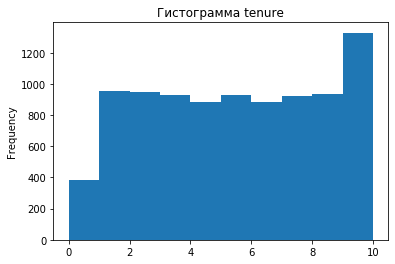

In [8]:
#построим гистограмму распределения количества объектов недвижимости
data['tenure'].plot(kind='hist', bins=10)
plt.title('Гистограмма tenure')

In [9]:
#посмотрим на корреляцию возраста и количества лет, в течение которых лицо является клиентом банка
data['tenure'].corr(data['age'])

-0.013134384930796534

Корреляции явной не наблюдается, следовательно, невозможно запонлить пропуски на основании данных о возрасте клиента.

In [10]:
data['tenure'].describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: tenure, dtype: float64

In [11]:
#посмотрим на мединанное значение tenure
data['tenure'].median()

5.0

In [12]:
#попробуем заполнить пропуски средними значениями
data['tenure_fill_mean'] = data['tenure'].fillna((data['tenure'].mean()))

Text(0.5, 1.0, 'Гистограмма tenure')

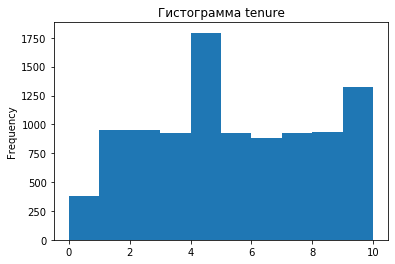

In [13]:
#посмотрим как изменилось распределение признака после заполнения пропусков средними значениями
data['tenure_fill_mean'].plot(kind='hist', bins=10)
plt.title('Гистограмма tenure')

Заполнение пропусков средними значение сильно сместило распределение.

In [14]:
#заполним пропуски медианными значениями
data['tenure_fill_median'] = data['tenure'].fillna((data['tenure'].median()))

Text(0.5, 1.0, 'Гистограмма tenure')

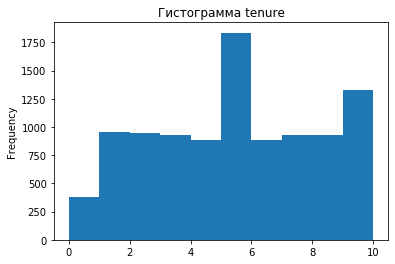

In [15]:
#посмотрим как изменилось распределение признака после заполнения пропусков средними значениями
data['tenure_fill_median'].plot(kind='hist', bins=10)
plt.title('Гистограмма tenure')

Заполнение пропусков медианными значениями также в значительной степени смещает распределение.

Поскольку заполнение пропусков медианными и средними значениями значительно смещает распределение, удалим пропущенные значения.

In [16]:
data.drop(columns = ['tenure_fill_mean', 'tenure_fill_median'], inplace = True)

In [17]:
data.dropna(subset = ['tenure'], inplace = True)
data['tenure'] = data['tenure'].astype('int')

In [18]:
#посмотрим на распределение по регионам
data['geography'].value_counts()

France     4550
Germany    2293
Spain      2248
Name: geography, dtype: int64

In [19]:
data.head(5)

,row_number,customer_id,surname,creditscore,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Вывод**

Датасет включает в себя 10 тысяч объектов и 14 признаков. 
В целях обучения из пула признаков можно исключить:<br>
row_number - индекс строки в данных <br>
customer_id - уникальный идентификатор клиента <br> 
surname - фамилию клиента. <br>

Целевым признаком в данном датасете является exited - факт ухода клиента. Поскольку целевой признак в модели - категориальный, будет решаться задача классификации. 

## 3. Исследование моделей
<a name="paragraph3"></a>

### 3.1 Выделение характеристик и целевого признака
<a name="subparagraph1"></a>

In [20]:
#удалим из датасета признаки, которые не будем использовать в анализе - индекс строки в данных, уникальный идентификатор и фамилию клиента
certain_features = ['row_number', 'customer_id', 'surname']
data = data.drop(certain_features, axis=1)

In [21]:
#преобразуем категориальные переменные в дамми переменные методом one-hot-coding
data.head(5)

,creditscore,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
categorial_features = ['geography', 'gender']
#создадим датасет с описательными признаками, удалив колонку с целевым признаком
features = data.drop(['exited'], axis=1)
features = pd.get_dummies(features, columns = categorial_features, drop_first=True)
#создадим датасет с целевым признаком
target = data['exited']

In [24]:
#разобьем датасет на обучающую и тестовую выборки
features_train, features_valid, target_train, target_valid = train_test_split(features, target, random_state = 12345, stratify = target)
features_test, features_valid, target_test, target_valid = train_test_split(features_valid, target_valid, test_size=0.5, random_state = 12345, stratify = target_valid)

In [25]:
#посмотрим на дисбаланс классов в обучающей выборке
target_train.value_counts()

0    5428
1    1390
Name: exited, dtype: int64

In [26]:
#посмотрим на дисбаланс классов в тестовой выборке
target_test.value_counts()

0    904
1    232
Name: exited, dtype: int64

In [27]:
target.value_counts()

0    7237
1    1854
Name: exited, dtype: int64

После использования процедуры stratify удалось сохранить пропорцию классов в обучающей, валидационной и тестовых выборках. Наблюдается значительный дисбаланс - отрицательных ответов в 4 раза больше, чем положительных.

### 3.2 Исследование моделей без учета дисбаланса классов
<a name="subparagraph2"></a>

In [28]:
#проверим метрики доли правильных ответов и f1_score для логистической регрессии с парамтерами по умолчанию
from sklearn.metrics import accuracy_score
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
accuracy_valid = accuracy_score(predicted_valid, target_valid)
print('Accuracy равна:', accuracy_valid)
print('Оценка F1_Score равна:', f1_score(target_valid, predicted_valid))

Accuracy равна: 0.7871591908531222
Оценка F1_Score равна: 0.07633587786259542


In [29]:
#проверим метрики случайного леса c параметрами, заданными по умолчанию
model = RandomForestClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
accuracy_valid = accuracy_score(predicted_valid, target_valid)
print('Accuracy равна:', accuracy_valid)
print('Оценка F1_Score равна:', f1_score(target_valid, predicted_valid))

Accuracy равна: 0.8592788038698329
Оценка F1_Score равна: 0.5897435897435898


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


*Алгоритм случайного леса демонстрирует наилучшие результаты по сравнению с моделью логистической регрессии.*

### 3.3 Борьба с дисбалансом классов
<a name="subparagraph3"></a>

In [30]:
#### подберем оптимальное количество деревьев и глубину дерева в алгоритме RandomForestClassifier, используя параметр class_weight, равный 'balanced', для придания большего веса объектам редкого класса
for depth in range (1, 30, 10):
    for est in range (1, 100, 20):
        model = RandomForestClassifier(random_state = 12345, max_depth = depth, n_estimators = est, class_weight = 'balanced')
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        ac_score = accuracy_score(predictions, target_valid)
        f1score = f1_score(target_valid, predictions)
        print('|Параметр глубины', depth, '|Количество деревьев', est, '|Accuracy score', ac_score, '|F1_score', f1score)

|Параметр глубины 1 |Количество деревьев 1 |Accuracy score 0.5743183817062445 |F1_score 0.3965087281795511
|Параметр глубины 1 |Количество деревьев 21 |Accuracy score 0.7502198768689534 |F1_score 0.5617283950617284
|Параметр глубины 1 |Количество деревьев 41 |Accuracy score 0.7194371152154794 |F1_score 0.5203007518796993
|Параметр глубины 1 |Количество деревьев 61 |Accuracy score 0.7343887423043096 |F1_score 0.5175718849840255
|Параметр глубины 1 |Количество деревьев 81 |Accuracy score 0.7291116974494283 |F1_score 0.5232198142414861
|Параметр глубины 11 |Количество деревьев 1 |Accuracy score 0.7590149516270889 |F1_score 0.5176056338028169
|Параметр глубины 11 |Количество деревьев 21 |Accuracy score 0.8478452066842568 |F1_score 0.6279569892473119
|Параметр глубины 11 |Количество деревьев 41 |Accuracy score 0.8557607739665787 |F1_score 0.6434782608695653
|Параметр глубины 11 |Количество деревьев 61 |Accuracy score 0.8522427440633246 |F1_score 0.6347826086956521
|Параметр глубины 11 |Коли

*Максимальное значение accuracy score (0.857) и F1_score (0.612) достигается при глубине деревьев, равной 11, и количестве деревьев, равном 81.*

In [31]:
#проведем процедуру upsampling (увеличим частоту объектов редкого класса)
from sklearn.utils import shuffle
def upsample(features, target, repeat):
    features_zeros = features_train[target_train == 0]
    features_ones = features_train[target_train == 1]
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state = 12345)
    return features_upsampled, target_upsampled

In [32]:
#посмотрим на метрики модели случайного леса при различном числе повторений
for repeat in range(1, 15, 1):
    features_upsampled, target_upsampled = upsample(features_train, target_train, repeat)
    
    model = RandomForestClassifier(max_depth=11, n_estimators = 81, random_state = 12345)
    model.fit(features_upsampled, target_upsampled)
    predictions = model.predict(features_valid)
    f1score = f1_score(target_valid, predictions)
    
    print('F1_score:',f1score, 'Repeats:', repeat)

F1_score: 0.6263157894736843 Repeats: 1
F1_score: 0.6270022883295195 Repeats: 2
F1_score: 0.6425531914893616 Repeats: 3
F1_score: 0.6230158730158729 Repeats: 4
F1_score: 0.6228893058161351 Repeats: 5
F1_score: 0.6106032906764167 Repeats: 6
F1_score: 0.5965517241379311 Repeats: 7
F1_score: 0.5709459459459458 Repeats: 8
F1_score: 0.5686591276252019 Repeats: 9
F1_score: 0.5696400625978091 Repeats: 10
F1_score: 0.5510835913312694 Repeats: 11
F1_score: 0.557427258805513 Repeats: 12
F1_score: 0.5398230088495575 Repeats: 13
F1_score: 0.5391304347826087 Repeats: 14


In [33]:
#проведем процедуру downsampling - отбросим часть отрицательных объектов
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

for fraction in np.arange(0.05, 0.30, 0.05):
    features_downsampled, target_downsampled = downsample(features_train, target_train, fraction)
    model = RandomForestClassifier(max_depth=11, n_estimators = 81, random_state = 12345)
    model.fit(features_downsampled, target_downsampled)
    predictions = model.predict(features_valid)
    f1score = f1_score(target_valid, predictions)
    print('F1_score:', f1score, 'Доля:', fraction)

F1_score: 0.4056939501779359 Доля: 0.05
F1_score: 0.4820627802690583 Доля: 0.1
F1_score: 0.5354330708661418 Доля: 0.15000000000000002
F1_score: 0.582701062215478 Доля: 0.2
F1_score: 0.608695652173913 Доля: 0.25


**Вывод** 
<br> 
*Процедура увеличения выборки позволила лишь незначительно повысить значение F1_score c 0,612 до 0,619. Процедура downsampling не позволила улучшить значение метрик.*


Произведем подготовку данных для дальнейшего подбора параметров на сырых и сбалансированных данных. 

In [34]:
#Произведем процедуру upsampling c параметром repeat, равным 4
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [35]:
#Произведем процедуру downsampling с параметром repeat, равным 0.25
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

Разделим получившиеся выборки на обучающие, валидационные и тестовые </div>

In [36]:
#произведем разбивку для данных, к которым применили процедуру upsample
features_up_train, features_up_valid, target_up_train, target_up_valid = train_test_split(features_upsampled, target_upsampled, random_state = 12345, stratify = target_upsampled)
features_up_test, features_up_valid, target_up_test, target_up_valid = train_test_split(features_up_valid, target_up_valid, test_size=0.5, random_state = 12345, stratify = target_up_valid)

In [37]:
#произведем разбивку для данных, к которым применили процдеуру downsample
features_down_train, features_down_valid, target_down_train, target_down_valid = train_test_split(features_downsampled, target_downsampled, random_state = 12345, stratify = target_downsampled)
features_down_test, features_down_valid, target_down_test, target_down_valid = train_test_split(features_down_valid, target_down_valid, test_size=0.5, random_state = 12345, stratify = target_down_valid)

### 3.4 Обучение логистической регрессии
<a name="subparagraph4"></a>

#### 3.4.1 Обучение на сырых данных
<a name="subparagraph5"></a>

In [38]:
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegression(random_state = 12345)

Осуществим отбор параметров с помощью GridSearchCV

In [39]:
from sklearn.model_selection import GridSearchCV
params = {'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [40]:
gs_for_lr1 = GridSearchCV(lr, params, cv=5, verbose=1, scoring='f1')

In [41]:
%%time
gs_for_lr1.fit(features_train, target_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

CPU times: user 29.5 s, sys: 28.1 s, total: 57.7 s
Wall time: 58.2 s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=12345, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [42]:
#сохраним модель с наилучшими параметрами
lr1_best = gs_for_lr1.best_estimator_
lr1_best

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=12345, solver='newton-cg', tol=0.0001,
                   verbose=0, warm_start=False)

In [43]:
#сохраним значение f1_score и roc_auc наилучшей модели на валидационной выборке
predict_valid = lr1_best.predict(features_valid)
lr1_best_f1_score = f1_score(target_valid, predict_valid)
lr1_probabilities = lr1_best.predict_proba(features_valid)
probabilities_one_valid = lr1_probabilities[:, 1]
lr1_auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('F1 score наилучшей модели: {} и roc_auc: {}'.format(lr1_best_f1_score, lr1_auc_roc))

F1 score наилучшей модели: 0.3096774193548387 и roc_auc: 0.7801581253572109


#### 3.4.2 Обучение на данных с параметром class_weight = 'balanced'
<a name="subparagraph6"></a>

In [44]:
lr2 = LogisticRegression(random_state = 12345)

In [45]:
from sklearn.model_selection import GridSearchCV
params = {'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'class_weight' : ['balanced']}

In [46]:
gs_for_lr2 = GridSearchCV(lr2, params, cv=5, verbose=1, scoring='f1')

In [47]:
%%time
gs_for_lr2.fit(features_train, target_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

CPU times: user 30.9 s, sys: 34 s, total: 1min 4s
Wall time: 1min 5s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=12345, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'class_weight': ['balanced'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [48]:
#сохраним модель с наилучшими параметрами
lr2_best = gs_for_lr2.best_estimator_

In [49]:
#сохраним значение f1_score и roc_auc наилучшей модели на валидационной выборке
predict_valid = lr2_best.predict(features_valid)
lr2_best_f1_score = f1_score(target_valid, predict_valid)
lr2_probabilities = lr2_best.predict_proba(features_valid)
probabilities_one_valid = lr2_probabilities[:, 1]
lr2_auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('F1 score наилучшей модели: {} и roc_auc: {}'.format(lr2_best_f1_score, lr2_auc_roc))

F1 score наилучшей модели: 0.5112781954887218 и roc_auc: 0.787240426747952


#### 3.4.3 Обучение на данных с применением процедуры upsample
<a name="subparagraph7"></a>

In [50]:
lr3 = LogisticRegression(random_state=12345)

Выберем параметры для перебора

In [51]:
from sklearn.model_selection import GridSearchCV
params = {'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [52]:
gs_for_lr3 = GridSearchCV(lr3, params, cv=5, verbose=1, scoring='f1')

In [53]:
%%time
gs_for_lr3.fit(features_upsampled, target_upsampled)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

CPU times: user 41 s, sys: 45.6 s, total: 1min 26s
Wall time: 1min 27s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=12345, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [54]:
lr3_best = gs_for_lr3.best_estimator_
lr3_best

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=12345, solver='newton-cg', tol=0.0001,
                   verbose=0, warm_start=False)

In [55]:
#сохраним значение f1_score и roc_auc наилучшей модели на валидационной выборке
predict_valid = lr3_best.predict(features_valid)
lr3_best_f1_score = f1_score(target_valid, predict_valid)
lr3_probabilities = lr3_best.predict_proba(features_valid)
probabilities_one_valid = lr3_probabilities[:, 1]
lr3_auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('F1 score наилучшей модели: {} и roc_auc: {}'.format(lr3_best_f1_score, lr3_auc_roc))

F1 score наилучшей модели: 0.514792899408284 и roc_auc: 0.7872451895599162


#### 3.4.4 Обучение на данных с применением процедуры downsample
<a name="subparagraph8"></a>

In [56]:
lr4 = LogisticRegression(random_state=12345)

Выберем параметры для перебора

In [57]:
from sklearn.model_selection import GridSearchCV
params = {'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [58]:
gs_for_lr4 = GridSearchCV(lr4, params, cv=5, verbose=1, scoring='f1')

In [59]:
%%time
gs_for_lr4.fit(features_downsampled, target_downsampled)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

CPU times: user 21.9 s, sys: 25.8 s, total: 47.7 s
Wall time: 48.3 s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=12345, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [60]:
lr4_best = gs_for_lr3.best_estimator_
lr4_best

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=12345, solver='newton-cg', tol=0.0001,
                   verbose=0, warm_start=False)

In [61]:
#сохраним значение f1_score и roc_auc наилучшей модели на валидационной выборке
predict_valid = lr4_best.predict(features_valid)
lr4_best_f1_score = f1_score(target_valid, predict_valid)
lr4_probabilities = lr4_best.predict_proba(features_valid)
probabilities_one_valid = lr4_probabilities[:, 1]
lr4_auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('F1 score наилучшей модели: {} и roc_auc: {}'.format(lr4_best_f1_score, lr4_auc_roc))

F1 score наилучшей модели: 0.514792899408284 и roc_auc: 0.7872451895599162


### 3.5 Обучение модели решающего дерева
<a name="subparagraph9"></a>

#### 3.5.1 Обучение на сырых данных
<a name="subparagraph10"></a>

In [62]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(random_state=12345)
params = {'criterion' : ['gini', 'entropy'], 'max_depth' : range(1,30), 'min_samples_split' : range(2,25,5), 'min_samples_leaf' : range(1,30,5)}

In [63]:
gs_for_dt1 = GridSearchCV(dt1, params, cv=5, verbose=1, scoring='f1')

In [64]:
%%time
gs_for_dt1.fit(features_train, target_train)

Fitting 5 folds for each of 1740 candidates, totalling 8700 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/si

CPU times: user 4min 22s, sys: 0 ns, total: 4min 22s
Wall time: 4min 27s


[Parallel(n_jobs=1)]: Done 8700 out of 8700 | elapsed:  4.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=12345,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30),
                        

In [65]:
#сохраним наилучшие параметры
dt1_best = gs_for_dt1.best_estimator_
dt1_best

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=22,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=12345, splitter='best')

In [66]:
#сохраним значение f1_score и roc_auc наилучшей модели на валидационной выборке
predict_valid = dt1_best.predict(features_valid)
dt1_best_f1_score = f1_score(target_valid, predict_valid)
dt1_probabilities = dt1_best.predict_proba(features_valid)
probabilities_one_valid = dt1_probabilities[:, 1]
dt1_auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('F1 score наилучшей модели: {} и roc_auc: {}'.format(dt1_best_f1_score, dt1_auc_roc))

F1 score наилучшей модели: 0.6192893401015229 и roc_auc: 0.8604424652314727


#### 3.5.2 Обучение на данных с параметром class_weight = 'balanced'
<a name="subparagraph11"></a>

In [67]:
dt2 = DecisionTreeClassifier(random_state=12345)
params = {'criterion' : ['gini', 'entropy'], 'max_depth' : range(1,30), 'min_samples_split' : range(2,25,5), 'min_samples_leaf' : range(1,30,5), 'class_weight' : ['balanced']}

In [68]:
gs_for_dt2 = GridSearchCV(dt1, params, cv=5, verbose=1, scoring='f1')

In [69]:
%%time
gs_for_dt2.fit(features_train, target_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1740 candidates, totalling 8700 fits
CPU times: user 4min 38s, sys: 0 ns, total: 4min 38s
Wall time: 4min 42s


[Parallel(n_jobs=1)]: Done 8700 out of 8700 | elapsed:  4.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=12345,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                     

In [70]:
#сохраним наилучшие параметры
dt2_best = gs_for_dt2.best_estimator_
dt2_best

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=21, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=12345, splitter='best')

In [71]:
#сохраним значение f1_score и roc_auc наилучшей модели на валидационной выборке
predict_valid = dt2_best.predict(features_valid)
dt2_best_f1_score = f1_score(target_valid, predict_valid)
dt2_probabilities = dt2_best.predict_proba(features_valid)
probabilities_one_valid = dt2_probabilities[:, 1]
dt2_auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('F1 score наилучшей модели: {} и roc_auc: {}'.format(dt2_best_f1_score, dt2_auc_roc))

F1 score наилучшей модели: 0.5690789473684211 и roc_auc: 0.8302533815964945


#### 3.5.3 Обучение на данных с применением процедуры upsample
<a name="subparagraph12"></a>

In [72]:
dt3 = DecisionTreeClassifier(random_state=12345)
params = {'criterion' : ['gini', 'entropy'], 'max_depth' : range(1,30), 'min_samples_split' : range(2,25,5), 'min_samples_leaf' : range(1,30,5)}

In [73]:
gs_for_dt3 = GridSearchCV(dt1, params, cv=5, verbose=1, scoring='f1')

In [74]:
%%time
gs_for_dt3.fit(features_upsampled, target_upsampled)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1740 candidates, totalling 8700 fits
CPU times: user 6min 16s, sys: 0 ns, total: 6min 16s
Wall time: 6min 20s


[Parallel(n_jobs=1)]: Done 8700 out of 8700 | elapsed:  6.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=12345,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30),
                        

In [75]:
#сохраним наилучшие параметры
dt3_best = gs_for_dt3.best_estimator_
dt3_best

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=28,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=12345, splitter='best')

In [76]:
#сохраним значение f1_score и roc_auc наилучшей модели на валидационной выборке
predict_valid = dt3_best.predict(features_valid)
dt3_best_f1_score = f1_score(target_valid, predict_valid)
dt3_probabilities = lr3_best.predict_proba(features_valid)
probabilities_one_valid = dt3_probabilities[:, 1]
dt3_auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('F1 score наилучшей модели: {} и roc_auc: {}'.format(lr3_best_f1_score, lr3_auc_roc))

F1 score наилучшей модели: 0.514792899408284 и roc_auc: 0.7872451895599162


#### 3.5.4 Обучение на данных с применением процедуры downsample
<a name="subparagraph13"></a>

In [77]:
dt4 = DecisionTreeClassifier(random_state=12345)
params = {'criterion' : ['gini', 'entropy'], 'max_depth' : range(1,30), 'min_samples_split' : range(2,25,5), 'min_samples_leaf' : range(1,30,5)}

In [78]:
gs_for_dt4 = GridSearchCV(dt1, params, cv=5, verbose=1, scoring='f1')

In [79]:
%%time
gs_for_dt4.fit(features_downsampled, target_downsampled)

Fitting 5 folds for each of 1740 candidates, totalling 8700 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CPU times: user 2min 5s, sys: 0 ns, total: 2min 5s
Wall time: 2min 5s


[Parallel(n_jobs=1)]: Done 8700 out of 8700 | elapsed:  2.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=12345,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30),
                        

In [80]:
#сохраним наилучшие параметры
dt4_best = gs_for_dt4.best_estimator_
dt4_best

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=22,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=12345, splitter='best')

In [81]:
#сохраним значение f1_score и roc_auc наилучшей модели на валидационной выборке
predict_valid = dt4_best.predict(features_valid)
dt4_best_f1_score = f1_score(target_valid, predict_valid)
dt4_probabilities = dt4_best.predict_proba(features_valid)
probabilities_one_valid = dt4_probabilities[:, 1]
dt4_auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('F1 score наилучшей модели: {} и roc_auc: {}'.format(dt4_best_f1_score, dt4_auc_roc))

F1 score наилучшей модели: 0.565982404692082 и roc_auc: 0.8646980377214707


### 3.6 Обучение модели случайного леса
<a name="subparagraph14"></a>

#### 3.6.1 Обучение на сырых данных
<a name="subparagraph15"></a>

In [82]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(random_state = 12345)
params = {'n_estimators' : range(1,110,10), 'criterion' : ['gini', 'entropy'], 'max_depth' : range(1,30,3)}

In [83]:
gs_for_rf1 = GridSearchCV(rf1, params, cv=5, verbose=1, scoring='f1')

In [84]:
%%time
gs_for_rf1.fit(features_train, target_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 220 candidates, totalling 1100 fits


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-sco

CPU times: user 7min 26s, sys: 0 ns, total: 7min 26s
Wall time: 7min 33s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=12345, verbose=0,
                                              warm_start=False),
             ii

In [85]:
#сохраним наилучшие параметры
rf1_best = gs_for_rf1.best_estimator_
rf1_best

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=28, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=71,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

In [86]:
#сохраним значение f1_score и roc_auc наилучшей модели на валидационной выборке
predict_valid = rf1_best.predict(features_valid)
rf1_best_f1_score = f1_score(target_valid, predict_valid)
rf1_probabilities = rf1_best.predict_proba(features_valid)
probabilities_one_valid = rf1_probabilities[:, 1]
rf1_auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('F1 score наилучшей модели: {} и roc_auc: {}'.format(rf1_best_f1_score, rf1_auc_roc))

F1 score наилучшей модели: 0.616580310880829 и roc_auc: 0.8650361973709277


#### 3.6.2 Обучение на данных с параметром class_weight = 'balanced'
<a name="subparagraph16"></a>

In [87]:
rf2 = RandomForestClassifier(random_state = 12345)
params = {'n_estimators' : range(1,110,10), 'criterion' : ['gini', 'entropy'], 'max_depth' : range(1,30,3), 'class_weight' : ['balanced']}

In [88]:
gs_for_rf2 = GridSearchCV(rf2, params, cv=5, verbose=1, scoring='f1')

In [89]:
%%time
gs_for_rf2.fit(features_train, target_train)

Fitting 5 folds for each of 220 candidates, totalling 1100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1100 out of 1100 | elapsed:  7.4min finished


CPU times: user 7min 16s, sys: 0 ns, total: 7min 16s
Wall time: 7min 22s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=12345, verbose=0,
                                              warm_start=False),
             ii

In [90]:
#сохраним наилучшие параметры
rf2_best = gs_for_rf2.best_estimator_
rf2_best

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=61, n_jobs=None, oob_score=False,
                       random_state=12345, verbose=0, warm_start=False)

In [91]:
#сохраним значение f1_score и roc_auc наилучшей модели на валидационной выборке
predict_valid = rf2_best.predict(features_valid)
rf2_best_f1_score = f1_score(target_valid, predict_valid)
rf2_probabilities = rf2_best.predict_proba(features_valid)
probabilities_one_valid = rf2_probabilities[:, 1]
rf2_auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('F1 score наилучшей модели: {} и roc_auc: {}'.format(rf2_best_f1_score, rf2_auc_roc))

F1 score наилучшей модели: 0.6369168356997972 и roc_auc: 0.8690560106686988


#### 3.6.3 Обучение на данных с применением процедуры upsample
<a name="subparagraph17"></a>

In [92]:
rf3 = RandomForestClassifier(random_state = 12345)
params = {'n_estimators' : range(1,110,10), 'criterion' : ['gini', 'entropy'], 'max_depth' : range(1,30,3)}

In [93]:
gs_for_rf3 = GridSearchCV(rf3, params, cv=5, verbose=1, scoring='f1')

In [94]:
%%time
gs_for_rf3.fit(features_upsampled, target_upsampled)

Fitting 5 folds for each of 220 candidates, totalling 1100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1100 out of 1100 | elapsed: 11.8min finished


CPU times: user 11min 39s, sys: 0 ns, total: 11min 39s
Wall time: 11min 51s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=12345, verbose=0,
                                              warm_start=False),
             ii

In [95]:
#сохраним наилучшие параметры
rf3_best = gs_for_rf3.best_estimator_
rf3_best

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=22, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=101,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

In [96]:
#сохраним значение f1_score и roc_auc наилучшей модели на валидационной выборке
predict_valid = rf3_best.predict(features_valid)
rf3_best_f1_score = f1_score(target_valid, predict_valid)
rf3_probabilities = rf3_best.predict_proba(features_valid)
probabilities_one_valid = rf3_probabilities[:, 1]
rf3_auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('F1 score наилучшей модели: {} и roc_auc: {}'.format(rf3_best_f1_score, rf3_auc_roc))

F1 score наилучшей модели: 0.6224256292906178 и roc_auc: 0.8610092398552105


#### 3.6.4 Обучение на данных с применением процедуры downsample
<a name="subparagraph18"></a>

In [97]:
rf4 = RandomForestClassifier(random_state = 12345)
params = {'n_estimators' : range(1,110,10), 'criterion' : ['gini', 'entropy'], 'max_depth' : range(1,30,3)}

In [98]:
gs_for_rf4 = GridSearchCV(rf3, params, cv=5, verbose=1, scoring='f1')

In [99]:
%%time
gs_for_rf4.fit(features_downsampled, target_downsampled)

Fitting 5 folds for each of 220 candidates, totalling 1100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1100 out of 1100 | elapsed:  4.0min finished


CPU times: user 3min 54s, sys: 0 ns, total: 3min 54s
Wall time: 3min 59s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=12345, verbose=0,
                                              warm_start=False),
             ii

In [100]:
#сохраним наилучшие параметры
rf4_best = gs_for_rf4.best_estimator_
rf4_best

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=71,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

In [101]:
#сохраним значение f1_score и roc_auc наилучшей модели на валидационной выборке
predict_valid = rf4_best.predict(features_valid)
rf4_best_f1_score = f1_score(target_valid, predict_valid)
rf4_probabilities = rf4_best.predict_proba(features_valid)
probabilities_one_valid = rf4_probabilities[:, 1]
rf4_auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('F1 score наилучшей модели: {} и roc_auc: {}'.format(rf4_best_f1_score, rf4_auc_roc))

F1 score наилучшей модели: 0.610738255033557 и roc_auc: 0.8688321585063822


### 4. Объединение полученных результатов в таблицу
<a name="paragraph4"></a>

In [102]:
models = pd.DataFrame({'Data' : ['not_balanced', 'class_weight = balanced', 'upsampled', 'downsampled']*3, 'Model' : ['LogisticRegression']*4 + ['DecisionTree']*4 + ['RandomForest']*4, 'F1_score':[lr1_best_f1_score, lr2_best_f1_score, lr3_best_f1_score, lr4_best_f1_score, dt1_best_f1_score, dt2_best_f1_score, dt3_best_f1_score, dt4_best_f1_score, rf1_best_f1_score, rf2_best_f1_score, rf3_best_f1_score, rf4_best_f1_score], 'ROC_AUC' : [lr1_auc_roc, lr2_auc_roc, lr3_auc_roc, lr4_auc_roc, dt1_auc_roc, dt2_auc_roc, dt3_auc_roc, dt4_auc_roc, rf1_auc_roc, rf2_auc_roc, rf3_auc_roc, rf4_auc_roc]})

In [103]:
#отсортируем таблицу по величине F1_score
models.sort_values('F1_score', ascending=False)

,Data,Model,F1_score,ROC_AUC
9,class_weight = balanced,RandomForest,0.636917,0.869056
10,upsampled,RandomForest,0.622426,0.861009
4,not_balanced,DecisionTree,0.619289,0.860442
8,not_balanced,RandomForest,0.616580,0.865036
11,downsampled,RandomForest,0.610738,0.868832
5,class_weight = balanced,DecisionTree,0.569079,0.830253
7,downsampled,DecisionTree,0.565982,0.864698
2,upsampled,LogisticRegression,0.514793,0.787245
3,downsampled,LogisticRegression,0.514793,0.787245
1,class_weight = balanced,LogisticRegression,0.511278,0.787240


Наилучшие результаты на валидационной выборке с точки зрения метрики F1_score продемонстрировала модель случайного леса, к которой применили процедуру upsampling. 

Посмотрим также на поведение моделей на тестовой выборке.

In [104]:
models = pd.DataFrame({'Data' : ['not_balanced', 'class_weight = balanced', 'upsampled', 'downsampled']*3, 'Model' : ['LogisticRegression']*4 + ['DecisionTree']*4 + ['RandomForest']*4, 'F1_score на валид. выборке':[lr1_best_f1_score, lr2_best_f1_score, lr3_best_f1_score, lr4_best_f1_score, dt1_best_f1_score, dt2_best_f1_score, dt3_best_f1_score, dt4_best_f1_score, rf1_best_f1_score, rf2_best_f1_score, rf3_best_f1_score, rf4_best_f1_score], 'ROC_AUC_на_валид_выборке' : [lr1_auc_roc, lr2_auc_roc, lr3_auc_roc, lr4_auc_roc, dt1_auc_roc, dt2_auc_roc, dt3_auc_roc, dt4_auc_roc, rf1_auc_roc, rf2_auc_roc, rf3_auc_roc, rf4_auc_roc], 'F1_score на тестовой выборке' : [f1_score(target_test, lr1_best.predict(features_test))]+
     [f1_score(target_test, lr2_best.predict(features_test))]+
     [f1_score(target_test, lr3_best.predict(features_test))]+
     [f1_score(target_test, lr4_best.predict(features_test))]+
     [f1_score(target_test, dt1_best.predict(features_test))]+
     [f1_score(target_test, dt2_best.predict(features_test))]+
     [f1_score(target_test, dt3_best.predict(features_test))]+
     [f1_score(target_test, dt4_best.predict(features_test))]+
     [f1_score(target_test, rf1_best.predict(features_test))]+
     [f1_score(target_test, rf2_best.predict(features_test))]+
     [f1_score(target_test, rf3_best.predict(features_test))]+
     [f1_score(target_test, rf4_best.predict(features_test))]})

In [105]:
#отсортируем таблицу по величине F1_score на тестовой выборке
models.sort_values('F1_score на тестовой выборке', ascending=False)

,Data,Model,F1_score на валид. выборке,ROC_AUC_на_валид_выборке,F1_score на тестовой выборке
10,upsampled,RandomForest,0.622426,0.861009,0.626728
4,not_balanced,DecisionTree,0.619289,0.860442,0.615764
9,class_weight = balanced,RandomForest,0.636917,0.869056,0.611570
8,not_balanced,RandomForest,0.616580,0.865036,0.596939
11,downsampled,RandomForest,0.610738,0.868832,0.575707
5,class_weight = balanced,DecisionTree,0.569079,0.830253,0.574225
7,downsampled,DecisionTree,0.565982,0.864698,0.547307
6,upsampled,DecisionTree,0.507527,0.787245,0.545842
1,class_weight = balanced,LogisticRegression,0.511278,0.787240,0.487370
2,upsampled,LogisticRegression,0.514793,0.787245,0.486091


На тестовой выборке также наилучшие результаты продемонстрировала модель случайного леса, к которой применили процедуру upsample. У данной модели следующие параметры: <br> 
- criterion: 'gini'
- max_depth: 22
- n_estimators: 101

### 5. Тестирование модели
<a name="paragraph5"></a>

In [106]:
#протестируем модель на тестовой выборке
model = RandomForestClassifier(n_estimators = 101, max_depth = 22, class_weight='balanced', random_state=12345)
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)

accuracy_test = accuracy_score(predicted_test, target_test)
print('Accuracy:', accuracy_test)
print('F1_Score:', f1_score(target_test, predicted_test))

Accuracy: 0.8617957746478874
F1_Score: 0.5943152454780362


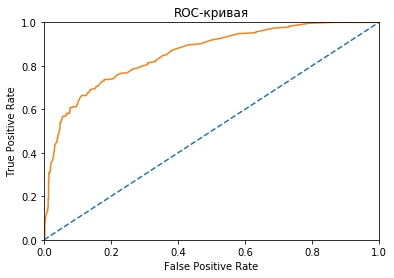

In [107]:
#построим ROC-кривую для тестовой выборки
from sklearn.metrics import roc_curve
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
plt.figure()
# ROC-кривая случайной модели 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

In [108]:
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print(auc_roc)

0.8553507400061031


Площадь под кривой ошибок составляет 0.86.

### 6. Общий вывод
<a name="paragraph6"></a>

В результате работы над проектом: <br>
- была произведена подготовка данных для решения задачи  классификации <br>
- прогнозирования факта ухода клиента <br>
- производился подбор оптимальных параметров моделей логистической регрессии, решающего дерева, случайного леса на сырых данных, с применением параметра 'balanced' <br>
- наилучшие результаты продемонстрировала на валидационной и тестовой выборках модель случайного леса с глубиной, равной 22, и количеством деревьев, равным 101 (площадь под кривой ошибок для данной модели составляет 0.86). <br> 